## Here we train single-hidden-layer fully-connected nets with different numbers of nodes

In [14]:
# Import functions
import setGPU0
from io_functions import *
from draw_functions import *
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt

In [4]:
# 1 is signal; 0 is background
train_data, test_data, train_labels, test_labels = train_test(shape=(10000,), split=0.33)

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Choose our list of number of nodes
num_nodes = [10]

# Make a one-hidden-layer network with that number of nodes for each entry in num_nodes.
# Train it for 100 epochs, save the model, the weights, and loss history.
for number in num_nodes:
    
    # Construct and compile a network
    model = Sequential()
    model.add(Dense(number, input_dim=10000, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(number, activation='sigmoid'))
    model.add(Dropout(0.5))
    model.add(Dense(1, init='uniform', activation='sigmoid'))
    check = ModelCheckpoint(filepath="./tmp/dense%sx10000weights.hdf5"%number, verbose=1)
    early = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    
    # Train the network
    my_fit = model.fit(train_data, train_labels, validation_split=0.2, 
                       nb_epoch=8, batch_size=1000, verbose=1, callbacks=[check, early])
    
    # Store the model, the weights, and the loss history
    store_model(model, my_fit.history, 'dense'+str(number)+'x10000')

Train on 43388 samples, validate on 10848 samples
Epoch 1/8
43388/43388 [==============================] - 2s - loss: 0.6933 - val_loss: 0.6930
Epoch 2/8
43388/43388 [==============================] - 2s - loss: 0.6931 - val_loss: 0.6927
Epoch 3/8
43388/43388 [==============================] - 1s - loss: 0.6930 - val_loss: 0.6925
Epoch 4/8
43388/43388 [==============================] - 1s - loss: 0.6930 - val_loss: 0.6923
Epoch 5/8
43388/43388 [==============================] - 1s - loss: 0.6925 - val_loss: 0.6921
Epoch 6/8
43388/43388 [==============================] - 2s - loss: 0.6927 - val_loss: 0.6920
Epoch 7/8
43388/43388 [==============================] - 2s - loss: 0.6925 - val_loss: 0.6918
Epoch 8/8
43388/43388 [==============================] - 1s - loss: 0.6923 - val_loss: 0.6916


In [10]:
my_fit.history['val_loss']

[0.69322799691232606,
 0.69284124562522298,
 0.69255365510429956,
 0.6923200837102963,
 0.6920950730553771,
 0.69187764797063001,
 0.69169813636305766,
 0.69148424931507901]

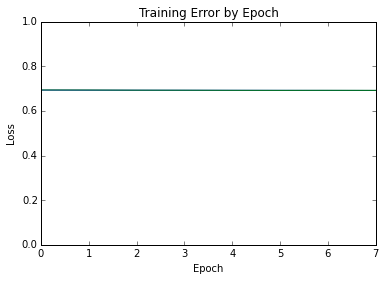

In [17]:
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Error by Epoch')
plt.plot(my_fit.history['val_loss'])
plt.plot(my_fit.history['loss'])